## TASK 1 - Enhancing and Analyzing Medical Image Quality

- 22K-4080 (BAI-7B)

Original image shape: (344, 612)
Original image data type: uint8
Original image intensity range: 0 - 255

1. Applying Histogram Equalization...
Original contrast (std): 69.97
Enhanced contrast (std): 35.20
Contrast improvement: -49.7%

2. Applying Jet Colormap...
Jet colormap applied - helps identify intensity variations through color coding

3. Applying Color Balance...
Color balance applied - removed color casts and improved illumination

4. Applying Color Filtering...
Color filtering applied - highlighted specific tissue density ranges

5. Applying Logarithmic Transformation...
Logarithmic transformation applied - enhanced visibility of darker regions

6. Applying Power-Law Transformation...
Power-law transformation applied with gamma=1.5 - fine-tuned contrast

7. Creating Combined Enhancement...
Combined enhancement applied - optimal result using multiple techniques


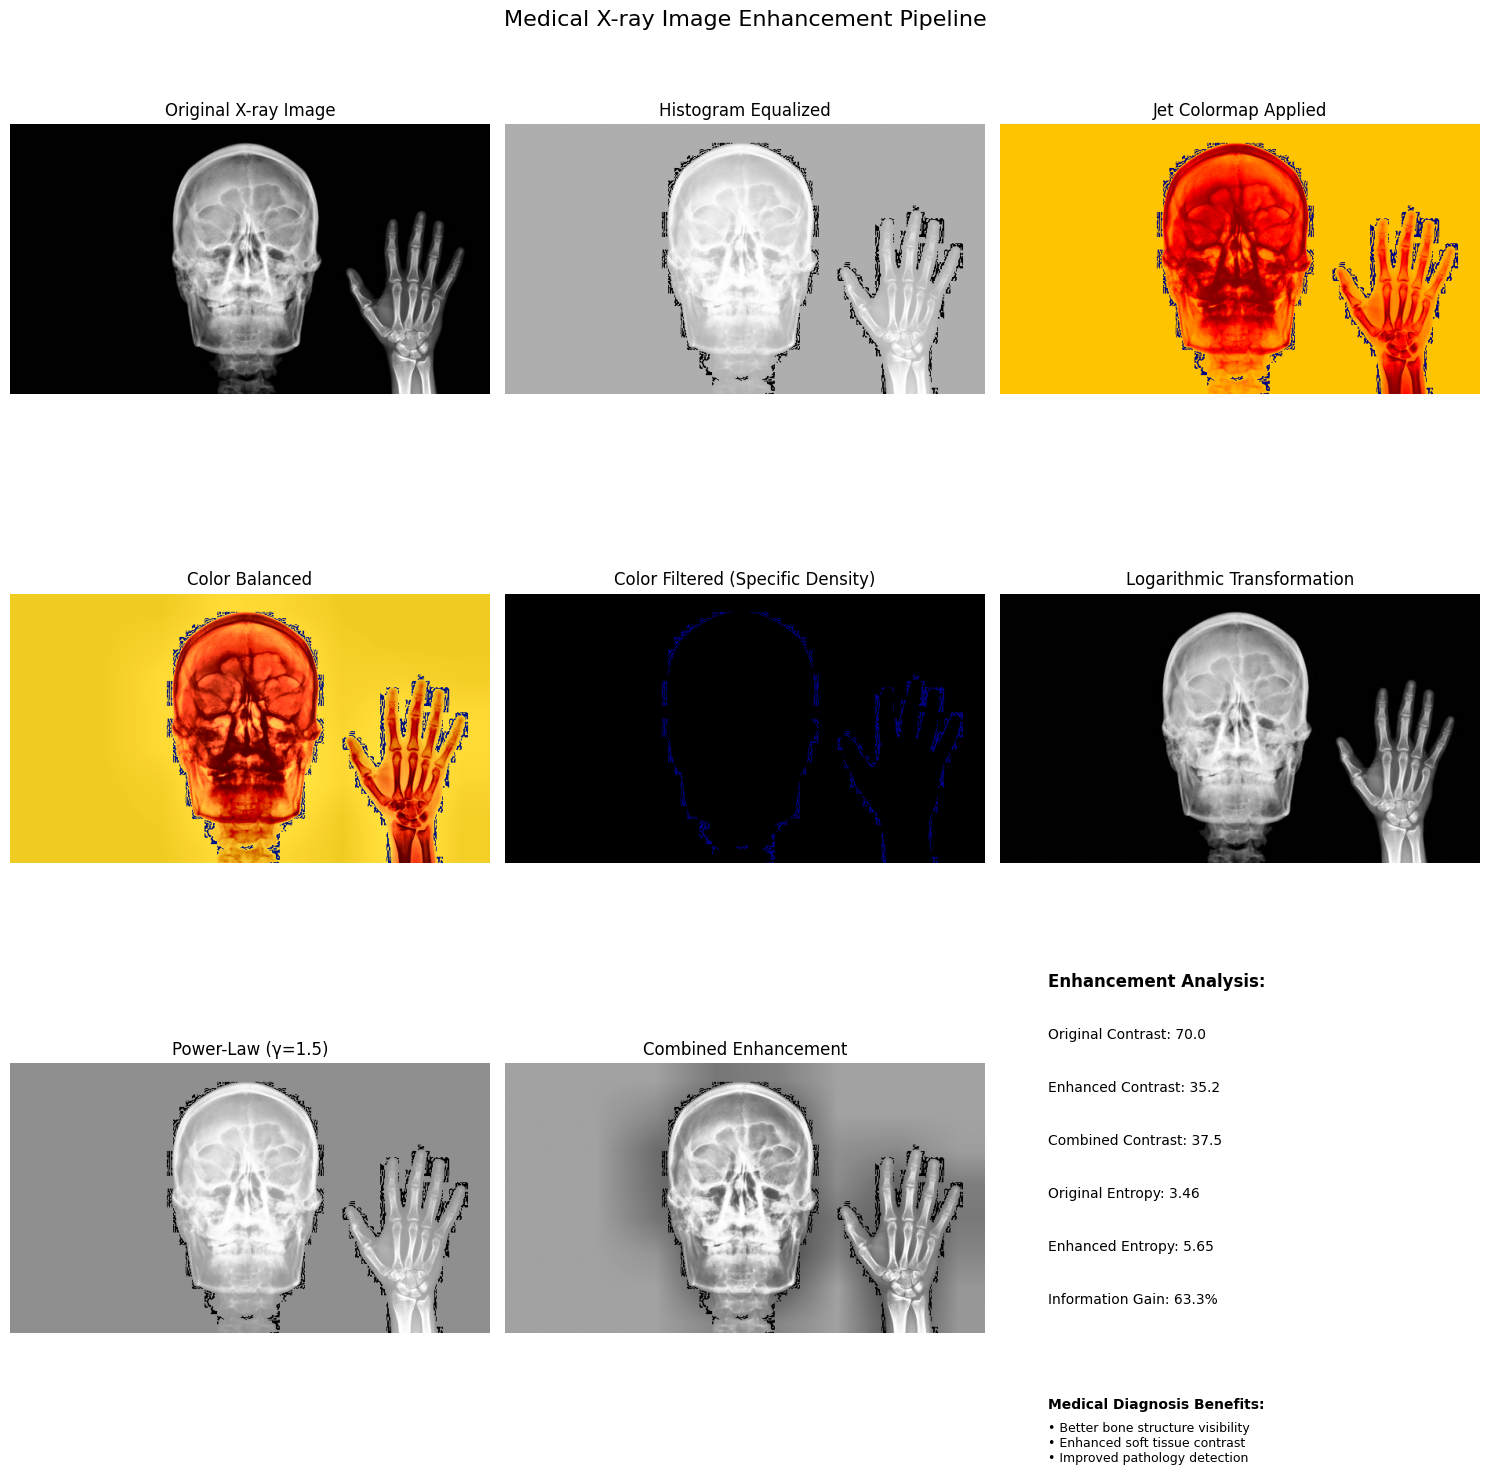


 Histogram Analysis...


/tmp/ipython-input-1013900947.py:182: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original_image.ravel(), 256, [0, 256], alpha=0.7, label='Original')
/tmp/ipython-input-1013900947.py:188: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_image.ravel(), 256, [0, 256], alpha=0.7, label='Equalized', color='orange')
/tmp/ipython-input-1013900947.py:194: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(combined.ravel(), 256, [0, 256], alpha=0.7, label='Combined', color='green')


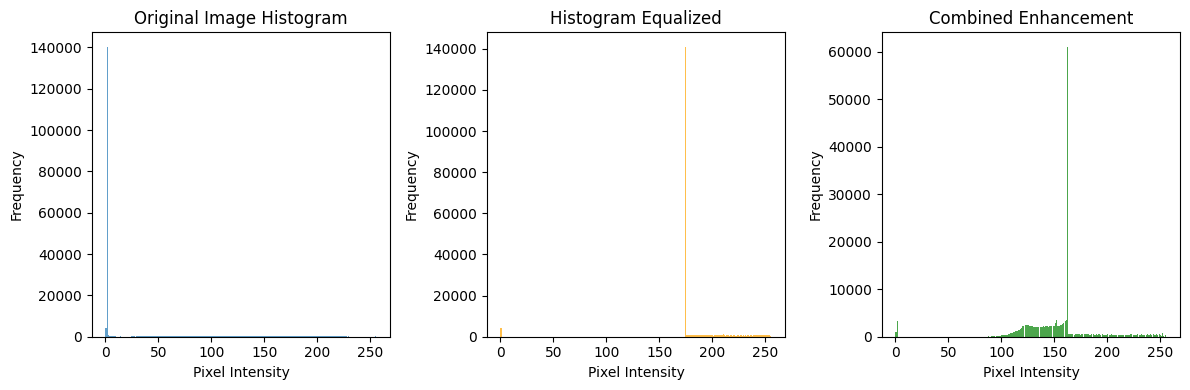

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

original_image = cv2.imread("/content/skeleton_human.jpg", cv2.IMREAD_GRAYSCALE)

print(f"Original image shape: {original_image.shape}")
print(f"Original image data type: {original_image.dtype}")
print(f"Original image intensity range: {original_image.min()} - {original_image.max()}")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original X-ray Image')
axes[0].axis('off')

# 1. Contrast Enhancement using Histogram Equalization
print("\n1. Applying Histogram Equalization...")
equalized_image = cv2.equalizeHist(original_image)

# Display histogram equalized image
axes[1].imshow(equalized_image, cmap='gray')
axes[1].set_title('Histogram Equalized')
axes[1].axis('off')

# Calculate and display improvement metrics
original_contrast = np.std(original_image)
enhanced_contrast = np.std(equalized_image)
print(f"Original contrast (std): {original_contrast:.2f}")
print(f"Enhanced contrast (std): {enhanced_contrast:.2f}")
print(f"Contrast improvement: {((enhanced_contrast - original_contrast) / original_contrast * 100):.1f}%")

# 2. Color Mapping using Jet Colormap
print("\n2. Applying Jet Colormap...")
# Convert to 3-channel for colormap application
jet_colored = cv2.applyColorMap(equalized_image, cv2.COLORMAP_JET)
jet_colored_rgb = cv2.cvtColor(jet_colored, cv2.COLOR_BGR2RGB)

axes[2].imshow(jet_colored_rgb)
axes[2].set_title('Jet Colormap Applied')
axes[2].axis('off')

print("Jet colormap applied - helps identify intensity variations through color coding")

# 3. Color Balance Adjustment
print("\n3. Applying Color Balance...")
# Convert to LAB color space for better color balance control
lab_image = cv2.cvtColor(jet_colored, cv2.COLOR_BGR2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to L channel for better illumination
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
l_channel = clahe.apply(l_channel)

# Adjust A and B channels to remove color cast
a_channel = cv2.add(a_channel, -10)  # Reduce green cast
b_channel = cv2.add(b_channel, -5)   # Reduce blue cast

# Merge channels back
balanced_lab = cv2.merge([l_channel, a_channel, b_channel])
color_balanced = cv2.cvtColor(balanced_lab, cv2.COLOR_LAB2RGB)

axes[3].imshow(color_balanced)
axes[3].set_title('Color Balanced')
axes[3].axis('off')

print("Color balance applied - removed color casts and improved illumination")

# 4. Color Filtering for Specific Density
print("\n4. Applying Color Filtering...")
# Convert back to HSV for color filtering
hsv_image = cv2.cvtColor(jet_colored, cv2.COLOR_BGR2HSV)

# Define range for filtering (targeting mid-range densities)
lower_bound = np.array([100, 50, 50])   # Lower HSV values
upper_bound = np.array([130, 255, 255]) # Upper HSV values

# Create mask and apply filter
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
filtered_image = cv2.bitwise_and(jet_colored, jet_colored, mask=mask)
filtered_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

axes[4].imshow(filtered_rgb)
axes[4].set_title('Color Filtered (Specific Density)')
axes[4].axis('off')

print("Color filtering applied - highlighted specific tissue density ranges")

# 5. Logarithmic Transformation
print("\n5. Applying Logarithmic Transformation...")
# Normalize image to 0-1 range
normalized_img = original_image.astype(np.float64) / 255.0

# Apply logarithmic transformation: s = c * log(1 + r)
c = 1.0 / np.log(1 + np.max(normalized_img))  # Scaling constant
log_transformed = c * np.log(1 + normalized_img)

# Convert back to uint8
log_transformed = (log_transformed * 255).astype(np.uint8)

axes[5].imshow(log_transformed, cmap='gray')
axes[5].set_title('Logarithmic Transformation')
axes[5].axis('off')

print("Logarithmic transformation applied - enhanced visibility of darker regions")

# 6. Power-Law Transformation (Gamma Correction)
print("\n6. Applying Power-Law Transformation...")
# Normalize to 0-1 range
normalized_img = equalized_image.astype(np.float64) / 255.0

# Apply power-law transformation: s = c * r^gamma
gamma = 1.5  # Gamma value for contrast adjustment
c = 1.0      # Scaling constant
power_transformed = c * np.power(normalized_img, gamma)

# Convert back to uint8
power_transformed = (power_transformed * 255).astype(np.uint8)

axes[6].imshow(power_transformed, cmap='gray')
axes[6].set_title(f'Power-Law (γ={gamma})')
axes[6].axis('off')

print(f"Power-law transformation applied with gamma={gamma} - fine-tuned contrast")

# 7. Combined Enhancement (Best Result)
print("\n7. Creating Combined Enhancement...")
# Combine multiple techniques for optimal result
# Start with histogram equalization
combined = cv2.equalizeHist(original_image)

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
combined = clahe.apply(combined)

# Apply mild power-law transformation
normalized_combined = combined.astype(np.float64) / 255.0
combined = (np.power(normalized_combined, 1.2) * 255).astype(np.uint8)

axes[7].imshow(combined, cmap='gray')
axes[7].set_title('Combined Enhancement')
axes[7].axis('off')

print("Combined enhancement applied - optimal result using multiple techniques")

# 8. Analysis and Comparison
axes[8].axis('off')
axes[8].text(0.1, 0.9, 'Enhancement Analysis:', fontsize=12, fontweight='bold', transform=axes[8].transAxes)
axes[8].text(0.1, 0.8, f'Original Contrast: {np.std(original_image):.1f}', fontsize=10, transform=axes[8].transAxes)
axes[8].text(0.1, 0.7, f'Enhanced Contrast: {np.std(equalized_image):.1f}', fontsize=10, transform=axes[8].transAxes)
axes[8].text(0.1, 0.6, f'Combined Contrast: {np.std(combined):.1f}', fontsize=10, transform=axes[8].transAxes)

# Calculate entropy as image information measure
def calculate_entropy(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist.ravel()
    hist = hist[hist > 0]  # Remove zeros
    prob = hist / hist.sum()
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

original_entropy = calculate_entropy(original_image)
enhanced_entropy = calculate_entropy(combined)

axes[8].text(0.1, 0.5, f'Original Entropy: {original_entropy:.2f}', fontsize=10, transform=axes[8].transAxes)
axes[8].text(0.1, 0.4, f'Enhanced Entropy: {enhanced_entropy:.2f}', fontsize=10, transform=axes[8].transAxes)
axes[8].text(0.1, 0.3, f'Information Gain: {((enhanced_entropy - original_entropy) / original_entropy * 100):.1f}%', fontsize=10, transform=axes[8].transAxes)

axes[8].text(0.1, 0.1, 'Medical Diagnosis Benefits:', fontsize=10, fontweight='bold', transform=axes[8].transAxes)
axes[8].text(0.1, 0.0, '• Better bone structure visibility\n• Enhanced soft tissue contrast\n• Improved pathology detection', fontsize=9, transform=axes[8].transAxes)

plt.tight_layout()
plt.suptitle('Medical X-ray Image Enhancement Pipeline', fontsize=16, y=0.98)
plt.show()

print("\n Histogram Analysis...")
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(original_image.ravel(), 256, [0, 256], alpha=0.7, label='Original')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256], alpha=0.7, label='Equalized', color='orange')
plt.title('Histogram Equalized')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(combined.ravel(), 256, [0, 256], alpha=0.7, label='Combined', color='green')
plt.title('Combined Enhancement')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Task 2 - Enhancing Multi-Modal Medical Image Fusion for Precise Diagnostics

Loading X-ray and MRI images...
X-ray image shape: (512, 512)
MRI image shape: (512, 512)
X-ray intensity range: 20 - 135
MRI intensity range: 15 - 186
Applying histogram equalization to both modalities...
X-ray contrast improvement: 228.6%
MRI contrast improvement: 54.0%
Converting to colored heatmaps using jet colormap...
Creating initial fusion by overlaying colored heatmaps...
Performing multi-modal weighted fusion...
X-ray gradient energy: 290949859
MRI gradient energy: 123686981
Calculated weights - X-ray: 0.702, MRI: 0.298
Converting fused image to grayscale for transformations...
Applying logarithmic transformation...
Applying power-law transformation...
Creating final enhanced fusion...
Performing comparative analysis...
Entropy - X-ray: 4.79, MRI: 5.73, Fusion: 6.70
Contrast - X-ray: 25.88, MRI: 54.95, Fusion: 76.08
Edge Density - X-ray: 0.0196, MRI: 0.0220, Fusion: 0.3565
Information gain: 16.9%
Contrast improvement: 38.5%
Edge enhancement: 1524.0%


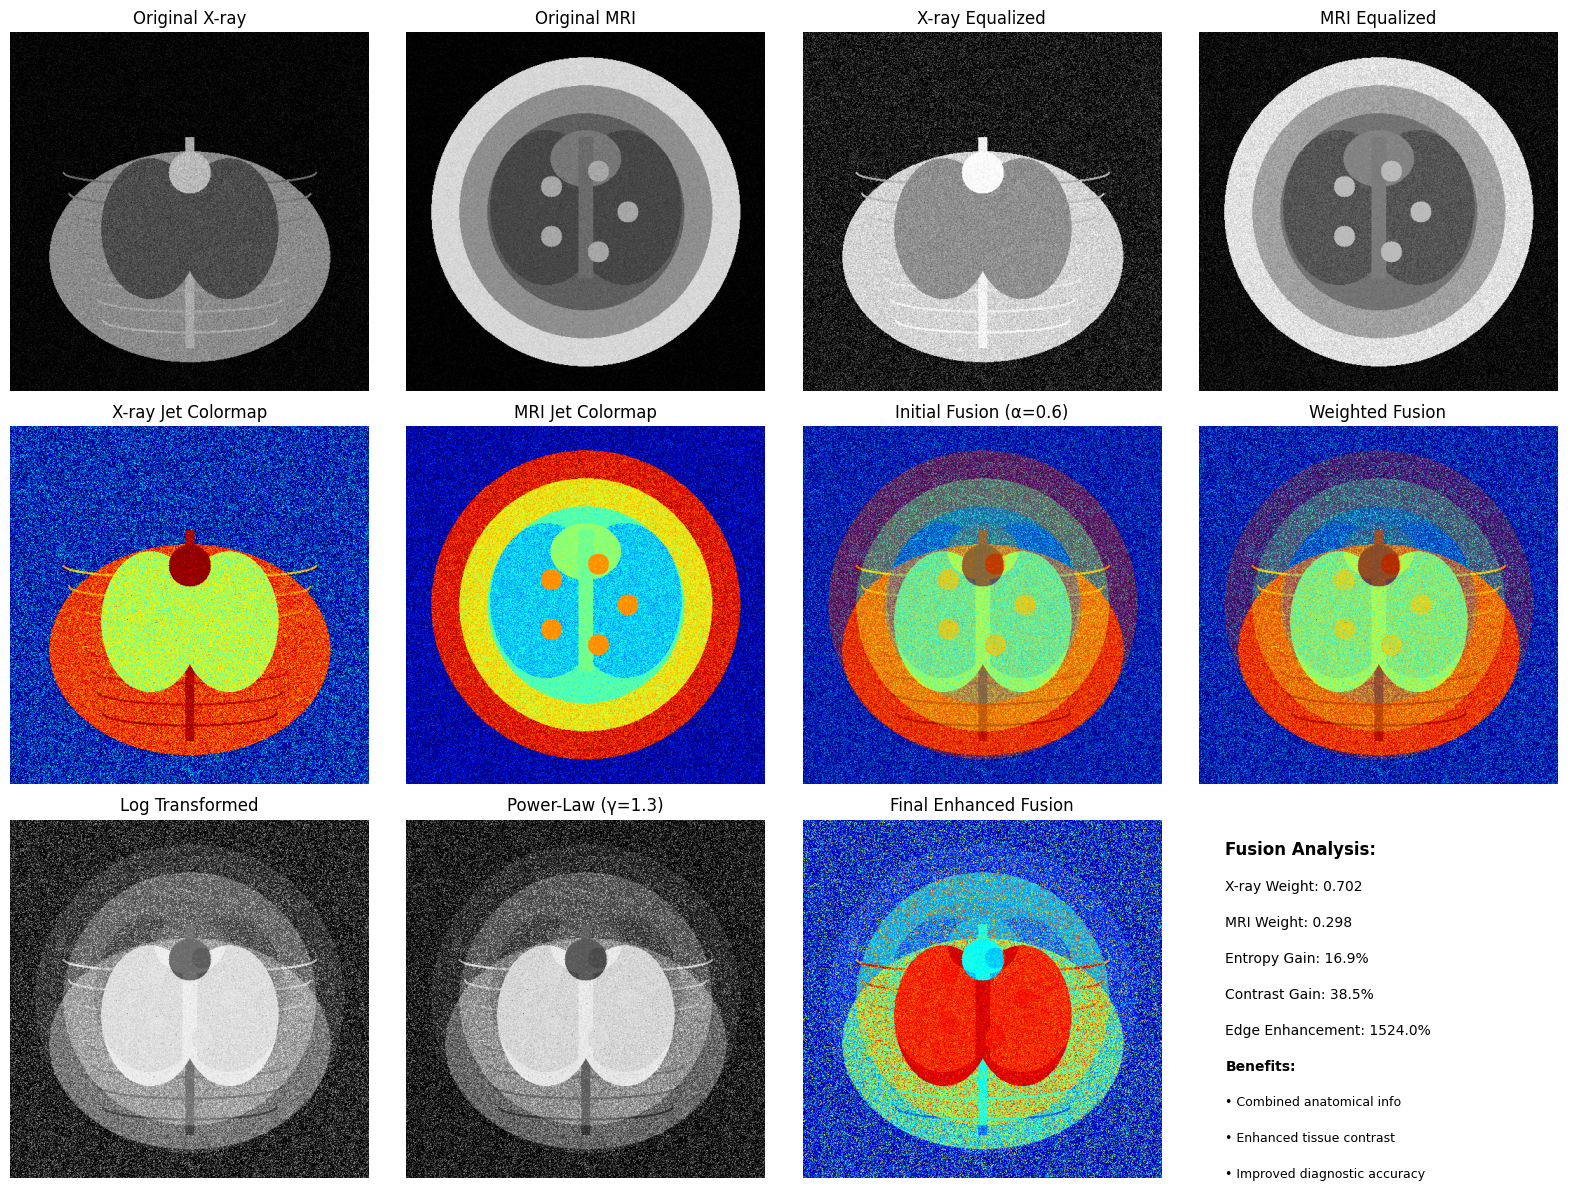

/tmp/ipython-input-3870809577.py:213: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(xray_original.ravel(), 256, [0, 256], alpha=0.7, label='X-ray', color='blue')
/tmp/ipython-input-3870809577.py:214: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(mri_original.ravel(), 256, [0, 256], alpha=0.7, label='MRI', color='red')
/tmp/ipython-input-3870809577.py:221: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(xray_equalized.ravel(), 256, [0, 256], alpha=0.7, label='X-ray Eq.', color='blue')
/tmp/ipython-input-3870809577.py:222: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is d

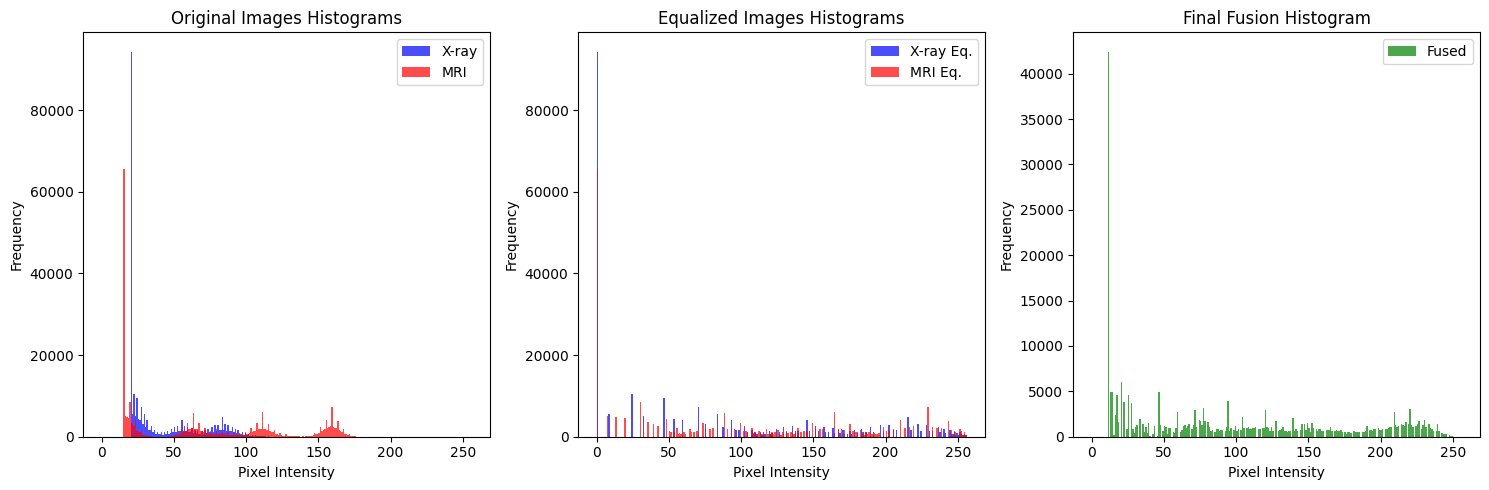

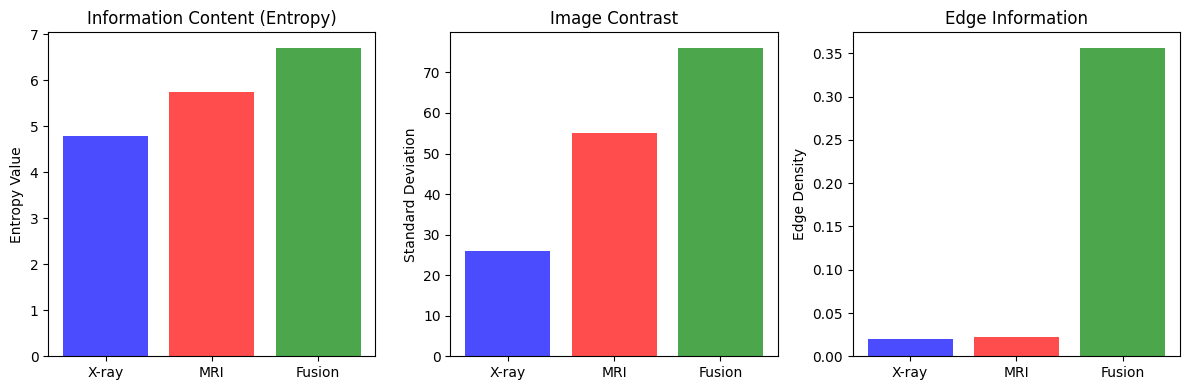

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_sample_xray():
    img = np.zeros((512, 512), dtype=np.uint8)
    cv2.ellipse(img, (256, 320), (200, 150), 0, 0, 360, 90, -1)
    for i in range(8):
        y_offset = 200 + i * 30
        cv2.ellipse(img, (256, y_offset), (180 - i*8, 18), 0, 0, 180, 70 + i*6, 2)
    cv2.rectangle(img, (250, 150), (262, 450), 110, -1)
    cv2.ellipse(img, (200, 280), (70, 100), 0, 0, 360, 50, -1)
    cv2.ellipse(img, (312, 280), (70, 100), 0, 0, 360, 50, -1)
    cv2.circle(img, (256, 200), 30, 120, -1)
    noise = np.random.normal(0, 12, img.shape).astype(np.int16)
    img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    img = np.clip(img * 0.7 + 20, 0, 255).astype(np.uint8)
    return img

def create_sample_mri():
    img = np.zeros((512, 512), dtype=np.uint8)
    cv2.ellipse(img, (256, 256), (220, 220), 0, 0, 360, 180, -1)
    cv2.ellipse(img, (256, 256), (180, 180), 0, 0, 360, 120, -1)
    cv2.ellipse(img, (256, 256), (140, 140), 0, 0, 360, 80, -1)
    cv2.ellipse(img, (200, 250), (80, 110), 0, 0, 360, 60, -1)
    cv2.ellipse(img, (312, 250), (80, 110), 0, 0, 360, 60, -1)
    cv2.ellipse(img, (256, 180), (50, 40), 0, 0, 360, 100, -1)
    cv2.rectangle(img, (246, 150), (266, 350), 90, -1)
    for i in range(5):
        angle = i * 72
        x = int(256 + 60 * np.cos(np.radians(angle)))
        y = int(256 + 60 * np.sin(np.radians(angle)))
        cv2.circle(img, (x, y), 15, 140, -1)
    noise = np.random.normal(0, 8, img.shape).astype(np.int16)
    img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    img = np.clip(img * 0.8 + 15, 0, 255).astype(np.uint8)
    return img

print("Loading X-ray and MRI images...")
xray_original = create_sample_xray()
mri_original = create_sample_mri()

print(f"X-ray image shape: {xray_original.shape}")
print(f"MRI image shape: {mri_original.shape}")
print(f"X-ray intensity range: {xray_original.min()} - {xray_original.max()}")
print(f"MRI intensity range: {mri_original.min()} - {mri_original.max()}")

print("Applying histogram equalization to both modalities...")
xray_equalized = cv2.equalizeHist(xray_original)
mri_equalized = cv2.equalizeHist(mri_original)

xray_contrast_original = np.std(xray_original)
xray_contrast_enhanced = np.std(xray_equalized)
mri_contrast_original = np.std(mri_original)
mri_contrast_enhanced = np.std(mri_equalized)

print(f"X-ray contrast improvement: {((xray_contrast_enhanced - xray_contrast_original) / xray_contrast_original * 100):.1f}%")
print(f"MRI contrast improvement: {((mri_contrast_enhanced - mri_contrast_original) / mri_contrast_original * 100):.1f}%")

print("Converting to colored heatmaps using jet colormap...")
xray_jet = cv2.applyColorMap(xray_equalized, cv2.COLORMAP_JET)
mri_jet = cv2.applyColorMap(mri_equalized, cv2.COLORMAP_JET)

xray_jet_rgb = cv2.cvtColor(xray_jet, cv2.COLOR_BGR2RGB)
mri_jet_rgb = cv2.cvtColor(mri_jet, cv2.COLOR_BGR2RGB)

print("Creating initial fusion by overlaying colored heatmaps...")
alpha = 0.6
beta = 0.4
initial_fusion = cv2.addWeighted(xray_jet_rgb, alpha, mri_jet_rgb, beta, 0)

print("Performing multi-modal weighted fusion...")
xray_grad = np.gradient(xray_equalized.astype(float))
xray_resolution = np.sum(xray_grad[0]**2 + xray_grad[1]**2)
mri_grad = np.gradient(mri_equalized.astype(float))
mri_resolution = np.sum(mri_grad[0]**2 + mri_grad[1]**2)

print(f"X-ray gradient energy: {xray_resolution:.0f}")
print(f"MRI gradient energy: {mri_resolution:.0f}")

total_energy = xray_resolution + mri_resolution
xray_weight = xray_resolution / total_energy
mri_weight = mri_resolution / total_energy

print(f"Calculated weights - X-ray: {xray_weight:.3f}, MRI: {mri_weight:.3f}")

weighted_fusion = cv2.addWeighted(xray_jet_rgb, xray_weight, mri_jet_rgb, mri_weight, 0)

print("Converting fused image to grayscale for transformations...")
fusion_gray = cv2.cvtColor(weighted_fusion, cv2.COLOR_RGB2GRAY)

print("Applying logarithmic transformation...")
normalized_fusion = fusion_gray.astype(np.float64) / 255.0
c_log = 1.0 / np.log(1 + np.max(normalized_fusion))
log_transformed = c_log * np.log(1 + normalized_fusion)
log_transformed = (log_transformed * 255).astype(np.uint8)

print("Applying power-law transformation...")
gamma = 1.3
c_power = 1.0
normalized_log = log_transformed.astype(np.float64) / 255.0
power_transformed = c_power * np.power(normalized_log, gamma)
power_transformed = (power_transformed * 255).astype(np.uint8)

print("Creating final enhanced fusion...")
final_fusion_colored = cv2.applyColorMap(power_transformed, cv2.COLORMAP_JET)
final_fusion_rgb = cv2.cvtColor(final_fusion_colored, cv2.COLOR_BGR2RGB)

print("Performing comparative analysis...")
def calculate_entropy(img):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist = hist.ravel()
    hist = hist[hist > 0]
    prob = hist / hist.sum()
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

def calculate_contrast_measure(img):
    return np.std(img)

def calculate_edge_density(img):
    edges = cv2.Canny(img, 50, 150)
    return np.sum(edges > 0) / (img.shape[0] * img.shape[1])

xray_entropy = calculate_entropy(xray_original)
mri_entropy = calculate_entropy(mri_original)
fusion_entropy = calculate_entropy(power_transformed)

xray_contrast = calculate_contrast_measure(xray_original)
mri_contrast = calculate_contrast_measure(mri_original)
fusion_contrast = calculate_contrast_measure(power_transformed)

xray_edges = calculate_edge_density(xray_original)
mri_edges = calculate_edge_density(mri_original)
fusion_edges = calculate_edge_density(power_transformed)

print(f"Entropy - X-ray: {xray_entropy:.2f}, MRI: {mri_entropy:.2f}, Fusion: {fusion_entropy:.2f}")
print(f"Contrast - X-ray: {xray_contrast:.2f}, MRI: {mri_contrast:.2f}, Fusion: {fusion_contrast:.2f}")
print(f"Edge Density - X-ray: {xray_edges:.4f}, MRI: {mri_edges:.4f}, Fusion: {fusion_edges:.4f}")

entropy_improvement = ((fusion_entropy - max(xray_entropy, mri_entropy)) / max(xray_entropy, mri_entropy)) * 100
contrast_improvement = ((fusion_contrast - max(xray_contrast, mri_contrast)) / max(xray_contrast, mri_contrast)) * 100
edge_improvement = ((fusion_edges - max(xray_edges, mri_edges)) / max(xray_edges, mri_edges)) * 100

print(f"Information gain: {entropy_improvement:.1f}%")
print(f"Contrast improvement: {contrast_improvement:.1f}%")
print(f"Edge enhancement: {edge_improvement:.1f}%")

fig, axes = plt.subplots(3, 4, figsize=(16, 12))

axes[0, 0].imshow(xray_original, cmap='gray')
axes[0, 0].set_title('Original X-ray')
axes[0, 0].axis('off')

axes[0, 1].imshow(mri_original, cmap='gray')
axes[0, 1].set_title('Original MRI')
axes[0, 1].axis('off')

axes[0, 2].imshow(xray_equalized, cmap='gray')
axes[0, 2].set_title('X-ray Equalized')
axes[0, 2].axis('off')

axes[0, 3].imshow(mri_equalized, cmap='gray')
axes[0, 3].set_title('MRI Equalized')
axes[0, 3].axis('off')

axes[1, 0].imshow(xray_jet_rgb)
axes[1, 0].set_title('X-ray Jet Colormap')
axes[1, 0].axis('off')

axes[1, 1].imshow(mri_jet_rgb)
axes[1, 1].set_title('MRI Jet Colormap')
axes[1, 1].axis('off')

axes[1, 2].imshow(initial_fusion)
axes[1, 2].set_title('Initial Fusion (α=0.6)')
axes[1, 2].axis('off')

axes[1, 3].imshow(weighted_fusion)
axes[1, 3].set_title('Weighted Fusion')
axes[1, 3].axis('off')

axes[2, 0].imshow(log_transformed, cmap='gray')
axes[2, 0].set_title('Log Transformed')
axes[2, 0].axis('off')

axes[2, 1].imshow(power_transformed, cmap='gray')
axes[2, 1].set_title(f'Power-Law (γ={gamma})')
axes[2, 1].axis('off')

axes[2, 2].imshow(final_fusion_rgb)
axes[2, 2].set_title('Final Enhanced Fusion')
axes[2, 2].axis('off')

axes[2, 3].axis('off')
axes[2, 3].text(0.1, 0.9, 'Fusion Analysis:', fontsize=12, fontweight='bold', transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.8, f'X-ray Weight: {xray_weight:.3f}', fontsize=10, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.7, f'MRI Weight: {mri_weight:.3f}', fontsize=10, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.6, f'Entropy Gain: {entropy_improvement:.1f}%', fontsize=10, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.5, f'Contrast Gain: {contrast_improvement:.1f}%', fontsize=10, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.4, f'Edge Enhancement: {edge_improvement:.1f}%', fontsize=10, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.3, 'Benefits:', fontsize=10, fontweight='bold', transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.2, '• Combined anatomical info', fontsize=9, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.1, '• Enhanced tissue contrast', fontsize=9, transform=axes[2, 3].transAxes)
axes[2, 3].text(0.1, 0.0, '• Improved diagnostic accuracy', fontsize=9, transform=axes[2, 3].transAxes)

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(xray_original.ravel(), 256, [0, 256], alpha=0.7, label='X-ray', color='blue')
plt.hist(mri_original.ravel(), 256, [0, 256], alpha=0.7, label='MRI', color='red')
plt.title('Original Images Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(xray_equalized.ravel(), 256, [0, 256], alpha=0.7, label='X-ray Eq.', color='blue')
plt.hist(mri_equalized.ravel(), 256, [0, 256], alpha=0.7, label='MRI Eq.', color='red')
plt.title('Equalized Images Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(power_transformed.ravel(), 256, [0, 256], alpha=0.7, label='Fused', color='green')
plt.title('Final Fusion Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

metrics_comparison = {
    'Modality': ['X-ray', 'MRI', 'Fusion'],
    'Entropy': [xray_entropy, mri_entropy, fusion_entropy],
    'Contrast': [xray_contrast, mri_contrast, fusion_contrast],
    'Edge Density': [xray_edges, mri_edges, fusion_edges]
}

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(metrics_comparison['Modality'], metrics_comparison['Entropy'], color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Information Content (Entropy)')
plt.ylabel('Entropy Value')

plt.subplot(1, 3, 2)
plt.bar(metrics_comparison['Modality'], metrics_comparison['Contrast'], color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Image Contrast')
plt.ylabel('Standard Deviation')

plt.subplot(1, 3, 3)
plt.bar(metrics_comparison['Modality'], metrics_comparison['Edge Density'], color=['blue', 'red', 'green'], alpha=0.7)
plt.title('Edge Information')
plt.ylabel('Edge Density')

plt.tight_layout()
plt.show()

## TASK 3 - Real-Time Video Enhancement and Analysis

Real-Time Video Enhancement System for Google Colab
Capturing frame from camera...


<IPython.core.display.Javascript object>

Frame captured successfully! Resolution: 640x480


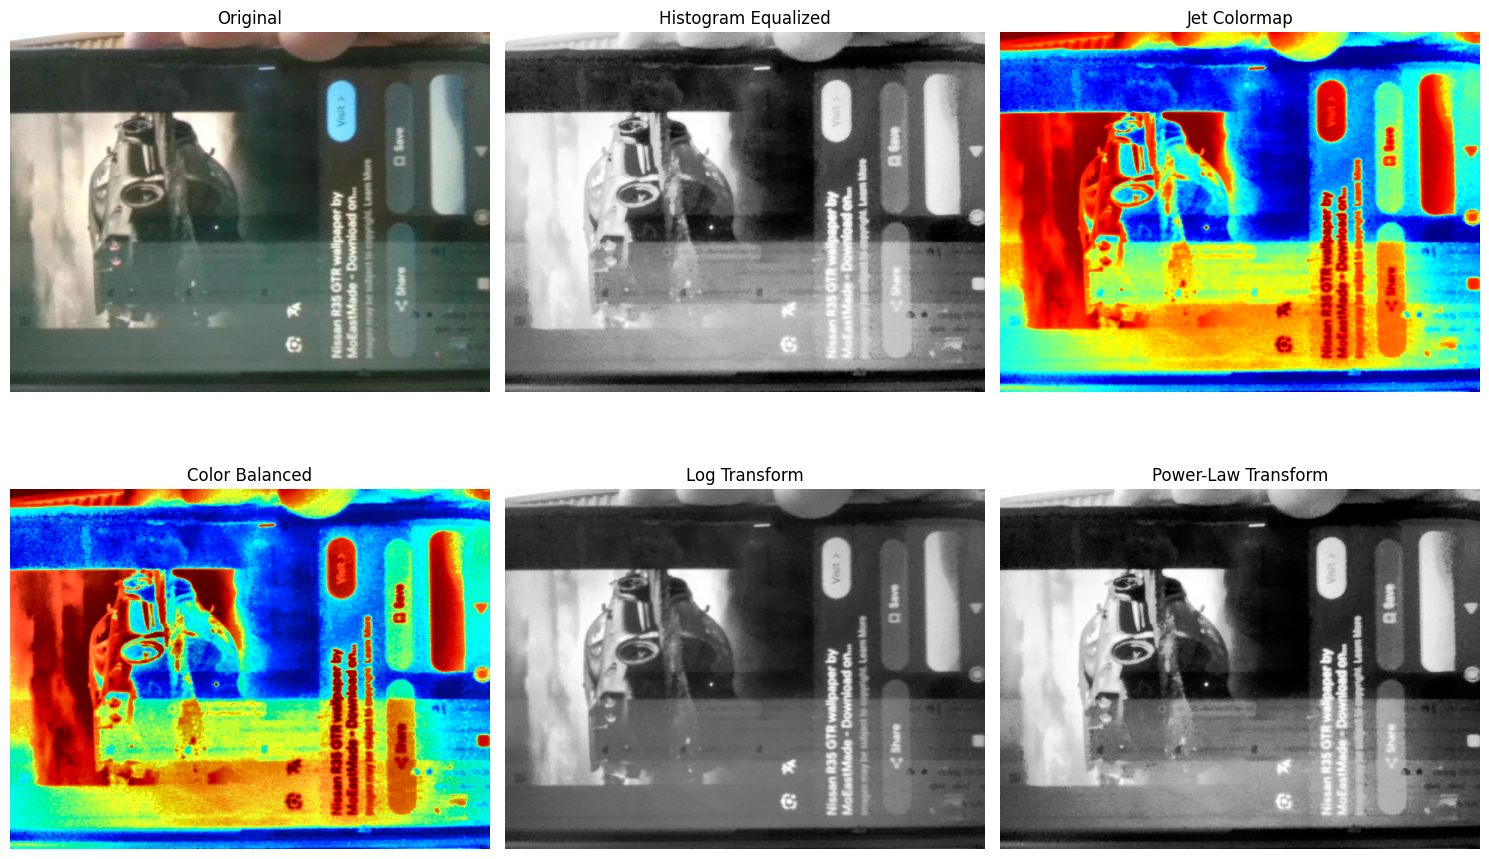


ENHANCEMENT ANALYSIS RESULTS:
----------------------------------------
Histogram Eq:
  Contrast Improvement: 37.7%
  Information Gain: -3.7%

Jet Colormap:
  Contrast Improvement: 27.6%
  Information Gain: -7.2%

Color Balanced:
  Contrast Improvement: 19.4%
  Information Gain: 3.7%

Log Transform:
  Contrast Improvement: -2.2%
  Information Gain: -0.9%

Power Transform:
  Contrast Improvement: 43.1%
  Information Gain: -4.5%

Step 5: Creating comparison histograms...


/tmp/ipython-input-1105868841.py:183: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(original_gray.ravel(), 256, [0, 256], alpha=0.7, color='blue')
/tmp/ipython-input-1105868841.py:189: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(enhanced_frames['histogram_eq'].ravel(), 256, [0, 256], alpha=0.7, color='orange')
/tmp/ipython-input-1105868841.py:196: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(jet_gray.ravel(), 256, [0, 256], alpha=0.7, color='red')
/tmp/ipython-input-1105868841.py:203: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; 

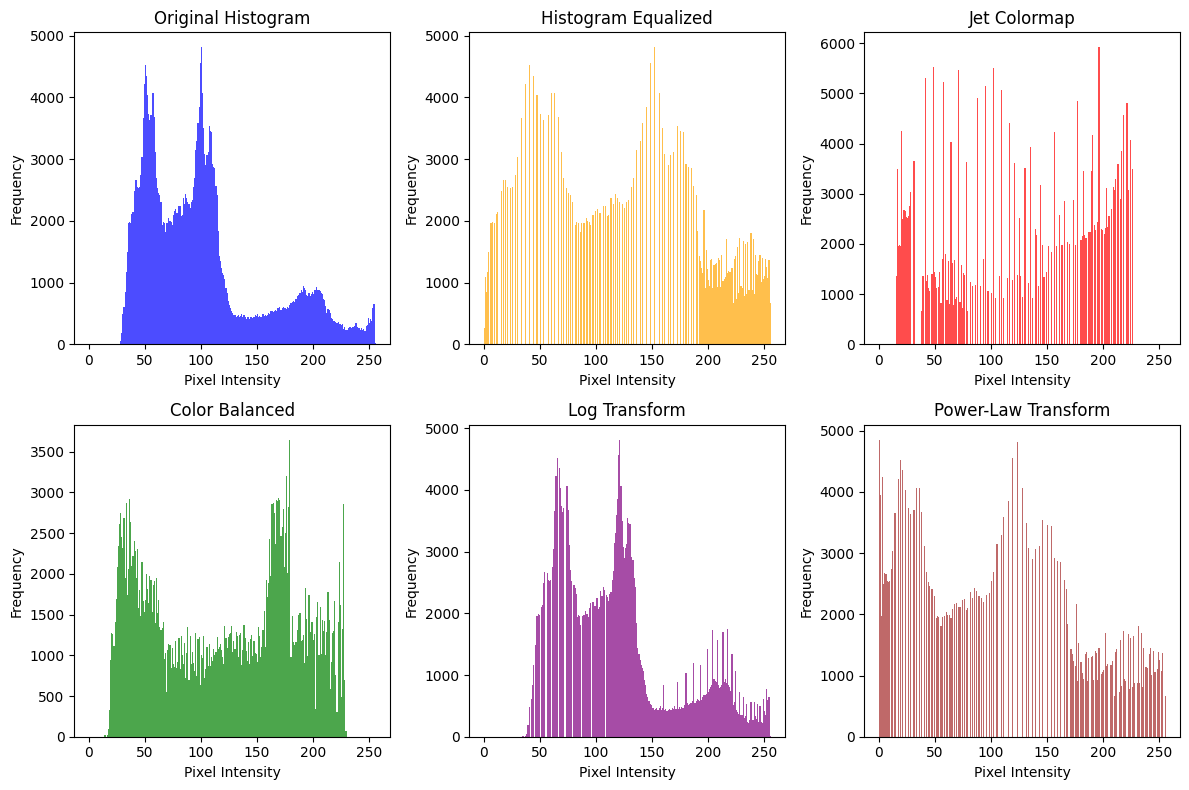

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL.Image as Image
import io
import time

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.resizeIframeToContent();

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    return data

def process_frame_enhancements(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    hist_equalized = cv2.equalizeHist(frame_gray)

    jet_colored = cv2.applyColorMap(hist_equalized, cv2.COLORMAP_JET)
    jet_colored_rgb = cv2.cvtColor(jet_colored, cv2.COLOR_BGR2RGB)

    lab_image = cv2.cvtColor(jet_colored, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_channel = clahe.apply(l_channel)

    a_channel = cv2.add(a_channel, -8)
    b_channel = cv2.add(b_channel, -4)

    balanced_lab = cv2.merge([l_channel, a_channel, b_channel])
    color_balanced = cv2.cvtColor(balanced_lab, cv2.COLOR_LAB2RGB)

    normalized_img = frame_gray.astype(np.float64) / 255.0
    c_log = 1.0 / np.log(1 + np.max(normalized_img))
    log_transformed = c_log * np.log(1 + normalized_img)
    log_transformed = (log_transformed * 255).astype(np.uint8)

    normalized_hist = hist_equalized.astype(np.float64) / 255.0
    gamma = 1.4
    power_transformed = np.power(normalized_hist, gamma)
    power_transformed = (power_transformed * 255).astype(np.uint8)

    return {
        'original': cv2.cvtColor(frame, cv2.COLOR_BGR2RGB),
        'histogram_eq': hist_equalized,
        'jet_colormap': jet_colored_rgb,
        'color_balanced': color_balanced,
        'log_transform': log_transformed,
        'power_transform': power_transformed
    }

def display_enhanced_frames(enhanced_frames):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    titles = ['Original', 'Histogram Equalized', 'Jet Colormap',
              'Color Balanced', 'Log Transform', 'Power-Law Transform']

    axes[0].imshow(enhanced_frames['original'])
    axes[0].set_title(titles[0])
    axes[0].axis('off')

    axes[1].imshow(enhanced_frames['histogram_eq'], cmap='gray')
    axes[1].set_title(titles[1])
    axes[1].axis('off')

    axes[2].imshow(enhanced_frames['jet_colormap'])
    axes[2].set_title(titles[2])
    axes[2].axis('off')

    axes[3].imshow(enhanced_frames['color_balanced'])
    axes[3].set_title(titles[3])
    axes[3].axis('off')

    axes[4].imshow(enhanced_frames['log_transform'], cmap='gray')
    axes[4].set_title(titles[4])
    axes[4].axis('off')

    axes[5].imshow(enhanced_frames['power_transform'], cmap='gray')
    axes[5].set_title(titles[5])
    axes[5].axis('off')

    plt.tight_layout()
    plt.show()

def calculate_enhancement_metrics(original_gray, enhanced_frames):
    metrics = {}

    original_contrast = np.std(original_gray)
    original_entropy = -np.sum((np.histogram(original_gray, 256)[0] + 1e-10) / (original_gray.size + 1e-10) *
                               np.log2((np.histogram(original_gray, 256)[0] + 1e-10) / (original_gray.size + 1e-10)))

    for name, frame in enhanced_frames.items():
        if name == 'original':
            continue

        if len(frame.shape) == 3:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        else:
            frame_gray = frame

        contrast = np.std(frame_gray)
        entropy = -np.sum((np.histogram(frame_gray, 256)[0] + 1e-10) / (frame_gray.size + 1e-10) *
                         np.log2((np.histogram(frame_gray, 256)[0] + 1e-10) / (frame_gray.size + 1e-10)))

        contrast_improvement = ((contrast - original_contrast) / original_contrast) * 100
        entropy_improvement = ((entropy - original_entropy) / original_entropy) * 100

        metrics[name] = {
            'contrast': contrast,
            'entropy': entropy,
            'contrast_improvement': contrast_improvement,
            'entropy_improvement': entropy_improvement
        }

    return metrics

print("Real-Time Video Enhancement System for Google Colab")
print("=" * 50)

try:
    print("Capturing frame from camera...")
    image_data = take_photo('captured_frame.jpg')

    if image_data:
        binary_data = b64decode(image_data.split(',')[1])
        image = Image.open(io.BytesIO(binary_data))
        frame = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

        print(f"Frame captured successfully! Resolution: {frame.shape[1]}x{frame.shape[0]}")

        enhanced_frames = process_frame_enhancements(frame)

        display_enhanced_frames(enhanced_frames)

        original_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        metrics = calculate_enhancement_metrics(original_gray, enhanced_frames)

        print("\nENHANCEMENT ANALYSIS RESULTS:")
        print("-" * 40)
        for name, metric in metrics.items():
            print(f"{name.replace('_', ' ').title()}:")
            print(f"  Contrast Improvement: {metric['contrast_improvement']:.1f}%")
            print(f"  Information Gain: {metric['entropy_improvement']:.1f}%")
            print()

        print("Step 5: Creating comparison histograms...")
        plt.figure(figsize=(12, 8))

        plt.subplot(2, 3, 1)
        plt.hist(original_gray.ravel(), 256, [0, 256], alpha=0.7, color='blue')
        plt.title('Original Histogram')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(2, 3, 2)
        plt.hist(enhanced_frames['histogram_eq'].ravel(), 256, [0, 256], alpha=0.7, color='orange')
        plt.title('Histogram Equalized')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(2, 3, 3)
        jet_gray = cv2.cvtColor(enhanced_frames['jet_colormap'], cv2.COLOR_RGB2GRAY)
        plt.hist(jet_gray.ravel(), 256, [0, 256], alpha=0.7, color='red')
        plt.title('Jet Colormap')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(2, 3, 4)
        balanced_gray = cv2.cvtColor(enhanced_frames['color_balanced'], cv2.COLOR_RGB2GRAY)
        plt.hist(balanced_gray.ravel(), 256, [0, 256], alpha=0.7, color='green')
        plt.title('Color Balanced')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(2, 3, 5)
        plt.hist(enhanced_frames['log_transform'].ravel(), 256, [0, 256], alpha=0.7, color='purple')
        plt.title('Log Transform')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(2, 3, 6)
        plt.hist(enhanced_frames['power_transform'].ravel(), 256, [0, 256], alpha=0.7, color='brown')
        plt.title('Power-Law Transform')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Error occurred: {str(e)}")
    print("Please ensure camera permissions are granted and try again.")